# Linked List - Merge sorted lists
### Problem List
- Merge Two Sorted Lists 
- Merge k Sorted Lists
- Merge In Between Linked Lists
### How?
1. Dummy Linked List 만들기
   - merge한 값들을 저장하기 위함
   - 꼭 tail (실제로 이동하는 pointer) 만들기
   - dummy가 backup인 느낌이고 실제로 결과값을 반영하기 위한 도구는 tail
2. 내가 필요한 것에 따라 function을 추가한다
   - 두개를 이어줄 때 어떤 부분을 삭제해야 하면 Remove -CE.ipynb를 참고하여 노드간의 엣지를 cut해준다
   - 넣어주는 것은 tail.next 등을 이용해주기
3. while문의 조건에 주의하자
   - 이동하고 있는 tail.next (혹은 내가 assign하는 대상)이 None이 되지 않도록 while문을 짜야한다
   - 결국 바꿔주는 값들이 while문으로 value가 있는 범위에서 이동할 수 있도록 하는 것임. 

## 21. Merge two sorted lists 
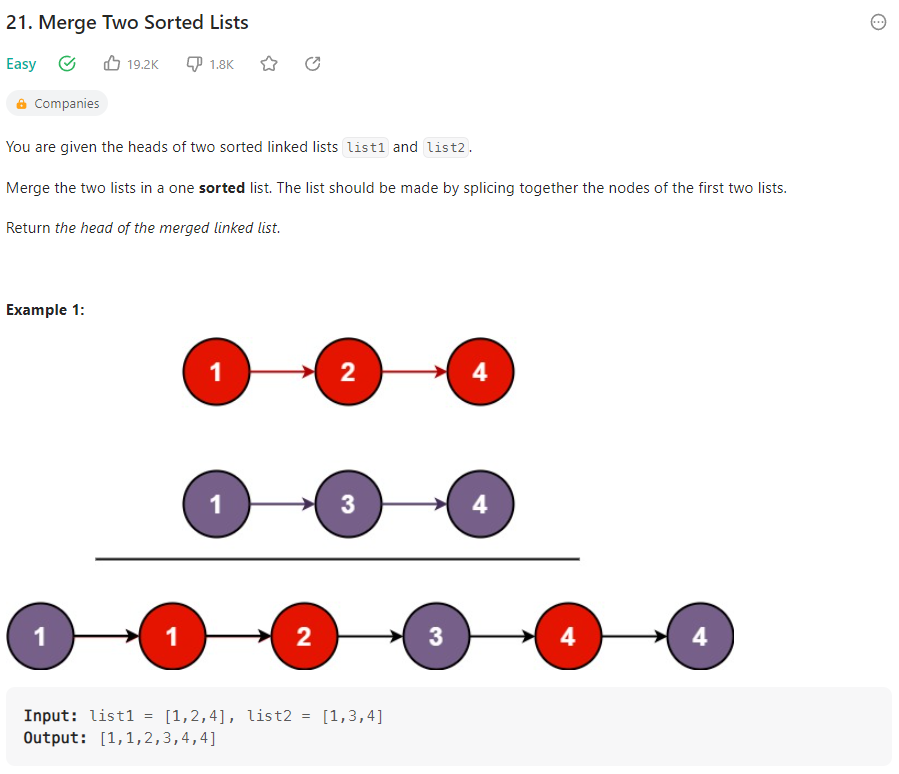

In [29]:
from typing import Optional, List
# Definition for singly-linked list.
class ListNode:
   def __init__(self, val=0, next=None):
      self.val = val
      self.next = next
class Solution:
    def mergeTwoLists(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode(0)
        tail = dummy
        # Until one of two list reaches end
        while l1 and l2:
            # compare two values all the time
            if l1.val >= l2.val:
                tail.next = l2
                # Move on to next node
                l2, tail = l2.next, l2
            else:
                tail.next = l1
                l1, tail = l1.next, l1
        # One element from one of two list will be remained
        if l1 or l2:
            tail.next = l1 if l1 else l2
        return dummy.next

In [30]:
# Example
list1 = list2 = ListNode()
list_1 = [1,2,4]
list_2 = [1,3,4]
for num in list_1:
   list1.next = ListNode(num)
   list1 = list1.next
for num in list_2:
   list2.next = ListNode(i)
   list2 = list2.next

In [31]:
answer = Solution().mergeTwoLists(list1,list2)

In [32]:
while answer:
    print(answer.val)
    answer = answer.next

4
5


## 23. Merge k sorted lists 
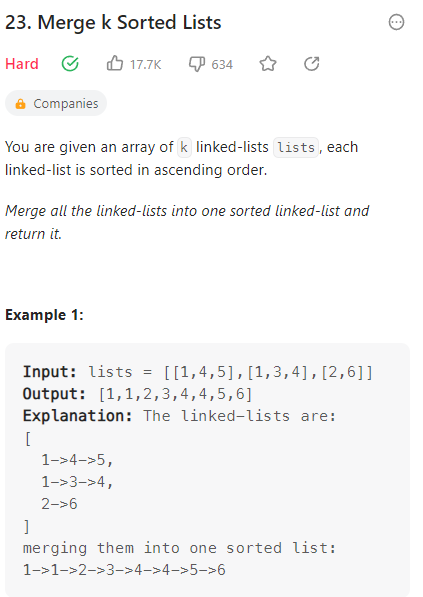

In [33]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergetwoLists(self, l1:Optional[ListNode], l2:Optional[ListNode])-> Optional[ListNode]:
        tail = dummy = ListNode(0)
        while l1 and l2:
            if l1.val < l2.val:
                tail.next = l1
                l1, tail = l1.next, l1
            else:
                tail.next = l2
                l2, tail = l2.next, l2
        # For the last element remains 
        if l1 or l2:
            tail.next = l1 if l1 else l2
        return dummy.next

    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if not lists:
            return None

        list_ = [lists[0]]
        for i in range(len(lists)-1):
            x = self.mergetwoLists(list_[i], lists[i+1])
            list_.append(x)
        
        return list_[-1]


### 1669. Merge In Between Linked Lists
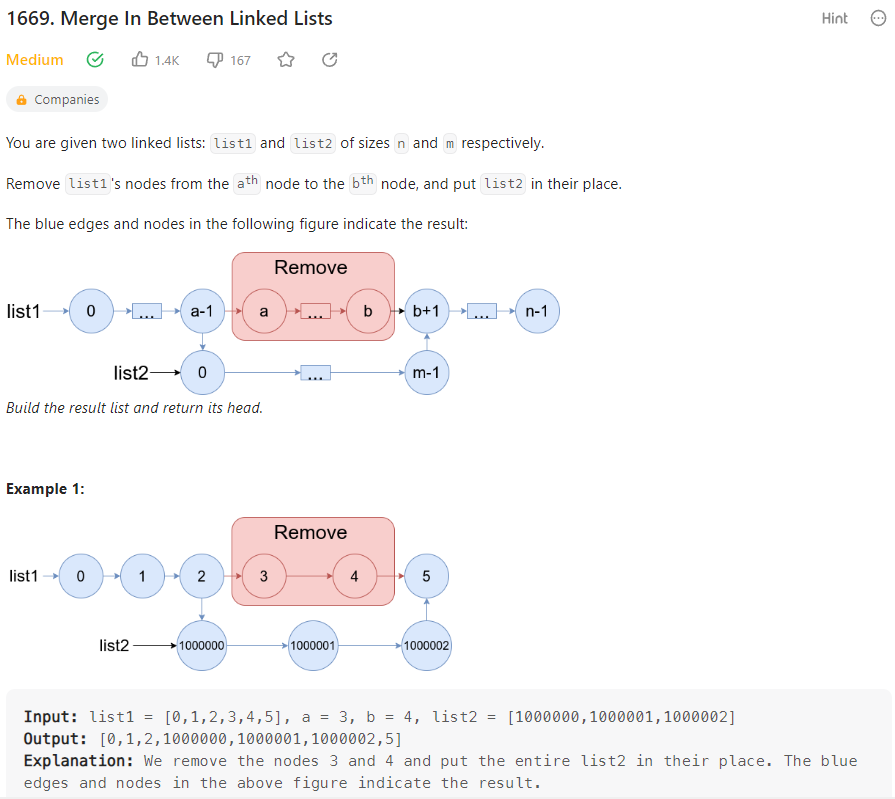

In [34]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:            
    def mergeInBetween(self, list1: ListNode, a: int, b: int, list2: ListNode) -> ListNode:
        first = second = list1
        i, j = 0,0
        
        # For reaching ath node
        while i!=a-1:
            first = first.next
            i += 1

        # For reaching bth node
        while j!=b:
            second = second.next
            j += 1
            
        # Connecting the first runner with second list
        first.next = list2

        # Until we reach the end of list2 we are connecting first and list2
        while list2.next:
            list2 = list2.next

        # Connecting the remaining part of list1
        list2.next = second.next

        return list1